<a href="https://colab.research.google.com/github/DemaAlejandro/Data-Exploration-and-Analysis-Terrorism-Hotspots/blob/main/TerrorismDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration: Terrorism Hotspots





In [ ]:
import pandas as pd
df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")

/tmp/ipython-input-1771211706.py:2: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")


In [ ]:
df.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


1. Definir variables necesrias: El df tiene 136 columnas y no es capaz de imprimirlas todas. Tenemos que usar de momento un DF mas pequeño para ir analizando sin tantas variables. Vamos a ver a priori cuales nos parecen importantes.

In [ ]:
#Haremos df.columns[:20], despues df.columns[21:40] para ir viendo las columnas.
#Veremos algunos valores con df['col'] y ver si es importante o no (todo NaN no es relevante)

In [ ]:
df.columns[120:]

Index(['ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome',
       'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite1', 'scite2',
       'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',
       'related'],
      dtype='object')

In [ ]:
cols_esenciales = [
    'iyear', 'imonth', 'iday','country_txt','region_txt','provstate','city', 'latitude', 'longitude','success', 'suicide','attacktype1_txt','targtype1_txt','gname',
    'weaptype1_txt','nkill','nwound',
]
df_reducido = df[cols_esenciales].copy()

In [ ]:
df_reducido.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [ ]:
df_reducido.shape

(181691, 17)

In [ ]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181256 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   success          181691 non-null  int64  
 10  suicide          181691 non-null  int64  
 11  attacktype1_txt  181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  gname            181691 non-null  object 
 14  weaptype1_txt    181691 non-null  object 
 15  nkill            171378 non-null  float64
 16  nwound           165380 non-null  floa

Ahora tenemos un df mas simple, podemos ver variables de tiempo, geograficas,  y de caracterticas del ataque

2. Crear variables derivadas basicas. Podemos añadir un par de nuevas columnas 'casualties' como suma de muertos y heridos y la otra seria 'date' con formato %YYYY-MM-DD pero hay a veces que imonth e iday son 0 entonces da error y no merece la pena.

In [ ]:
#df_reducido['date'] = pd.to_datetime({"year": df_reducido['iyear'], "month": df_reducido['imonth'], "day": df_reducido['iday']}, errors='coerce')
df_reducido['casualties'] = df_reducido['nkill'].fillna(0) + df_reducido['nwound'].fillna(0)

In [ ]:
df_reducido.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound,casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,0.0


3. Inspeccion de NaN y valores basura.

In [ ]:
# Número de valores faltantes por columna
df_reducido.isna().sum()

# Porcentaje de valores faltantes
(df_reducido.isna().sum() / len(df_reducido)) * 100


,0
iyear,0.000000
imonth,0.000000
iday,0.000000
country_txt,0.000000
region_txt,0.000000
provstate,0.231712
city,0.239417
latitude,2.507554
longitude,2.508104
success,0.000000


9% en nwound y 5.6% en nkill son los valores más altos pero se pueden rellenar con 0. Si no hay nada escrito es normal pensar que nadie resulto herido.
En latitud y longitud hay 2.5% de NaN, muy pocos y se podrian eliminar esas filas. Posiblemente coincidan.
Luego hay un valor muy bajo de provstate y city pero como no creo que filtremos por estado o ciudades, sino solo por paises o regiones se pueden dejar como NaN.

In [ ]:
df_reducido['nkill'] = df_reducido['nkill'].fillna(0)
df_reducido['nwound'] = df_reducido['nwound'].fillna(0)
df_reducido = df_reducido.dropna(subset=['latitude', 'longitude'])

In [ ]:
df_reducido.longitude.shape

(177134,)

In [ ]:
# Por ejemplo, gname
df_reducido['gname'].value_counts(dropna=False).head(50)


,count
gname,
Unknown,81485
Taliban,7457
Islamic State of Iraq and the Levant (ISIL),5584
Shining Path (SL),4306
Al-Shabaab,3274
Farabundo Marti National Liberation Front (FMLN),2991
Irish Republican Army (IRA),2662
New People's Army (NPA),2502
Boko Haram,2408


Como no parece que haya valores basura en las variables de texto, no se va a hacer nada.

In [ ]:
incidents_year = df_reducido.groupby("iyear").size().reset_index(name="num_incidents")
print(incidents_year)

    iyear  num_incidents
0    1970            643
1    1971            463
2    1972            551
3    1973            465
4    1974            577
5    1975            727
6    1976            900
7    1977           1292
8    1978           1455
9    1979           2533
10   1980           2561
11   1981           2469
12   1982           2408
13   1983           2670
14   1984           3198
15   1985           2680
16   1986           2680
17   1987           2989
18   1988           3471
19   1989           4147
20   1990           3648
21   1991           4405
22   1992           4832
23   1994           3295
24   1995           2920
25   1996           2909
26   1997           2996
27   1998            891
28   1999           1341
29   2000           1772
30   2001           1883
31   2002           1310
32   2003           1263
33   2004           1137
34   2005           1985
35   2006           2716
36   2007           3190
37   2008           4756
38   2009           4706


Question 1/a)
How has the number of terrorist activities changed over the years?

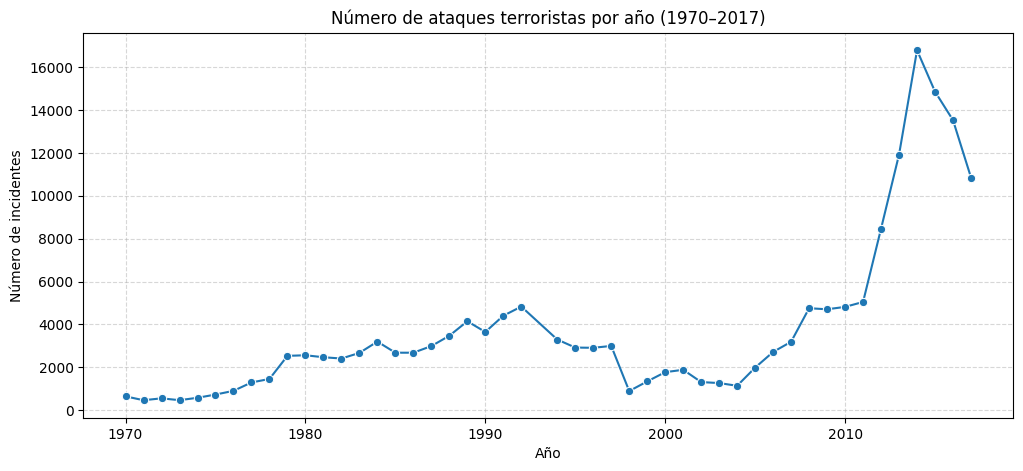

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(data=incidents_year, x="iyear", y="num_incidents", marker="o")
plt.title("Número de ataques terroristas por año (1970–2017)")
plt.xlabel("Año")
plt.ylabel("Número de incidentes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
peak = incidents_year.loc[incidents_year["num_incidents"].idxmax()]
print(f"Año con más incidentes: {peak.iyear} ({peak.num_incidents} ataques)")


Año con más incidentes: 2014 (16794 ataques)


In [ ]:
decade = (df_reducido["iyear"] // 10) * 10
decade_counts = df_reducido.groupby(decade).size().reset_index(name='decade_growth')
print(decade_counts)


   iyear  decade_growth
0   1970           9606
1   1980          29273
2   1990          27237
3   2000          24718
4   2010          86300


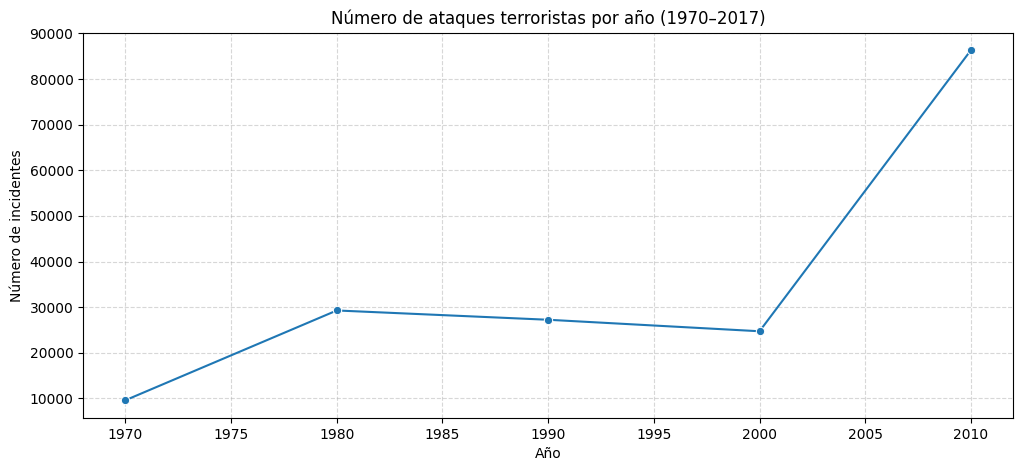

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=decade_counts, x="iyear", y="decade_growth", marker="o")
plt.title("Número de ataques terroristas por año (1970–2017)")
plt.xlabel("Año")
plt.ylabel("Número de incidentes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Del 70 al 80 los casos aumentan un 300%, y se mantienen durante dos decadas, hasta el 2000 para luego volver a crecer un 300% hasta 2010.

Question 1/b)
Are there certain regions where this trend is different from the global averages?

In [ ]:
incidents_region_year = (
    df_reducido.groupby(["iyear", "region_txt"])
    .size()
    .reset_index(name="num_incidents")
)
print(incidents_region_year.head())


   iyear                   region_txt  num_incidents
0   1970        Australasia & Oceania              1
1   1970  Central America & Caribbean              6
2   1970                    East Asia              2
3   1970               Eastern Europe             12
4   1970   Middle East & North Africa             28


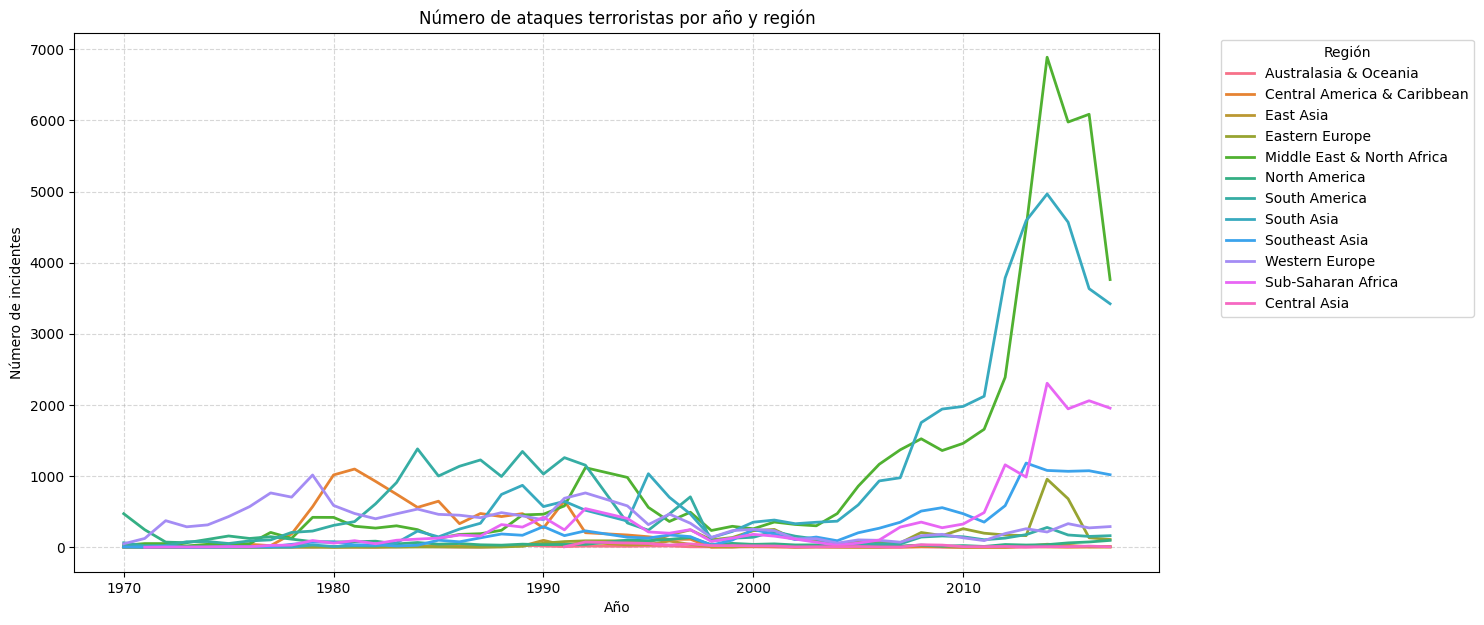

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(
    data=incidents_region_year,
    x="iyear", y="num_incidents", hue="region_txt", lw=2
)
plt.title("Número de ataques terroristas por año y región")
plt.xlabel("Año")
plt.ylabel("Número de incidentes")
plt.legend(title="Región", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Pasamos los datos a un nuevo formato para poder calcular la media anual de la suma de las regiones.

In [ ]:
df4 = incidents_region_year.pivot(index="iyear", columns="region_txt", values="num_incidents").fillna(0)
df4 = df4.sort_index()   # opcional: asegurar orden cronológico
df4.head(15)


region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1.0,6.0,0.0,2.0,12.0,28.0,472.0,63.0,1.0,9.0,0.0,49.0
1971,1.0,4.0,0.0,1.0,5.0,52.0,247.0,23.0,0.0,5.0,1.0,124.0
1972,3.0,3.0,0.0,0.0,0.0,52.0,73.0,25.0,1.0,16.0,4.0,374.0
1973,1.0,6.0,0.0,2.0,1.0,19.0,64.0,78.0,1.0,1.0,4.0,288.0
1974,1.0,11.0,0.0,4.0,2.0,42.0,111.0,81.0,2.0,3.0,5.0,315.0
1975,0.0,9.0,0.0,10.0,0.0,44.0,159.0,53.0,4.0,6.0,10.0,432.0
1976,0.0,42.0,0.0,2.0,0.0,51.0,124.0,90.0,4.0,7.0,8.0,572.0
1977,0.0,23.0,0.0,4.0,2.0,209.0,149.0,104.0,2.0,8.0,27.0,764.0
1978,2.0,187.0,0.0,35.0,2.0,126.0,115.0,209.0,2.0,41.0,31.0,705.0


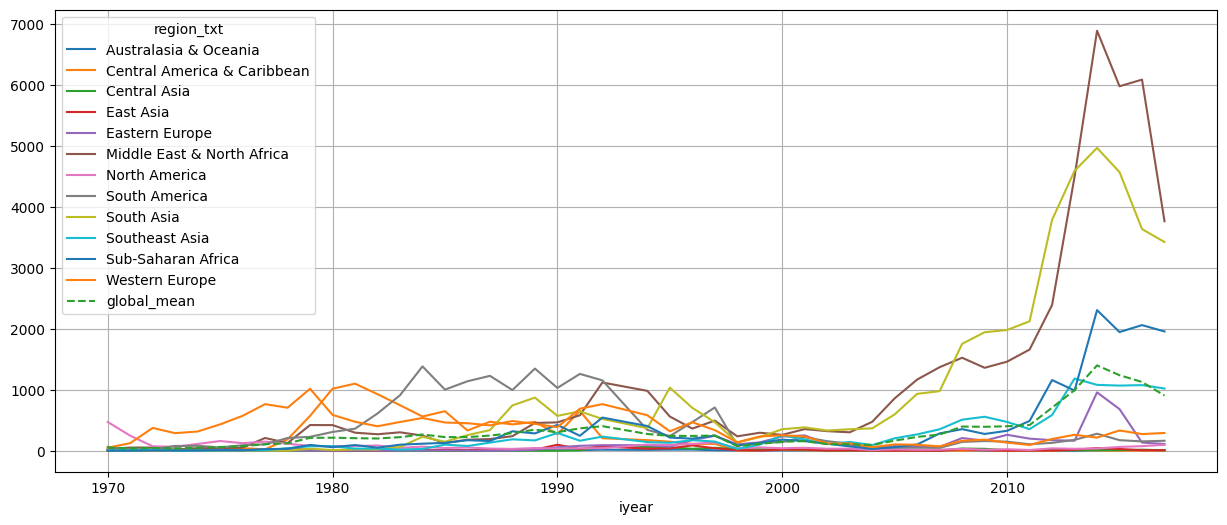

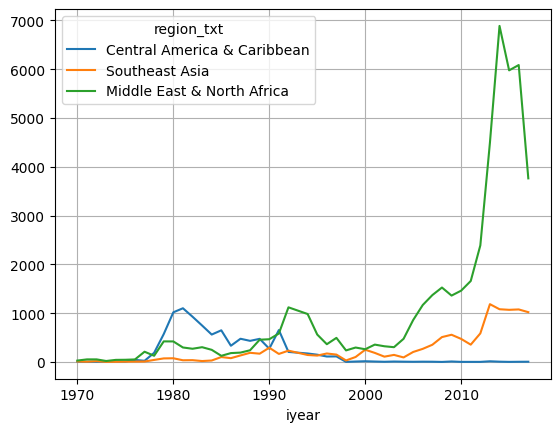

In [ ]:
def add_row_mean(df):
    # compute row-wise mean
    glob_mean = df.mean(axis=1)
    # add new column to DataFrame
    df['global_mean'] = glob_mean
add_row_mean(df4)
df4.sort_index().tail(15)

df4 = df4.sort_index()
df4.plot(figsize=(15, 6), grid=True, style=['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '--'])
plt.show()

df4[['Central America & Caribbean', 'Southeast Asia', 'Middle East & North Africa']].plot(grid=True)
plt.show()

df4.index.name = 'year'
df_race = df4.apply(pd.to_numeric, errors='coerce', axis=1)

Se escojen 3 regiones que demuestren que el crecimiento por regiones no ha sido para nada igual. Aunque de los 70-00 puedan estar dentro de un rango parecido, a partir de 2005 es cuando mayor cambio regional se produce.

Question 2-)
Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?

In [ ]:
yearly = df_reducido.groupby("iyear").agg(
    incidents=("iyear", "count"),
    casualties=("casualties", "sum"),
).reset_index()
yearly.head(15)

,iyear,incidents,casualties
0,1970,643,348.0
1,1971,463,254.0
2,1972,551,949.0
3,1973,465,863.0
4,1974,577,1402.0
5,1975,727,1232.0
6,1976,900,1355.0
7,1977,1292,959.0
8,1978,1455,2945.0
9,1979,2533,4046.0


In [ ]:
corr = yearly["incidents"].corr(yearly["casualties"])
print(f"Correlación entre incidentes y víctimas: {corr:.2f}")


Correlación entre incidentes y víctimas: 0.95


Correlacion muy alta, casi perfecta.

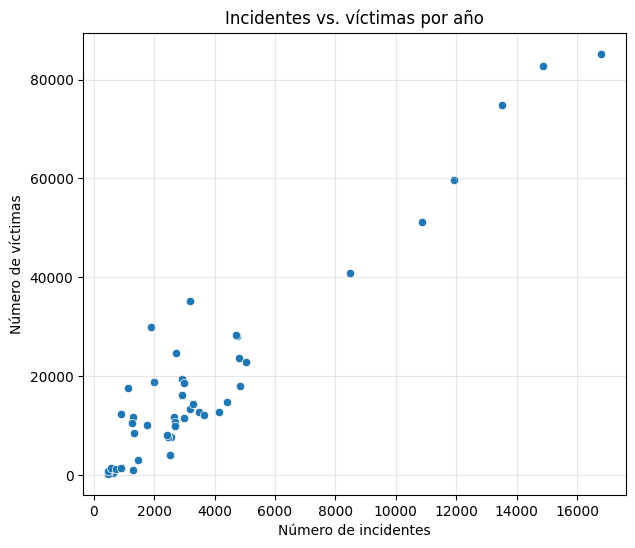

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=yearly, x="incidents", y="casualties")
plt.title("Incidentes vs. víctimas por año")
plt.xlabel("Número de incidentes")
plt.ylabel("Número de víctimas")
plt.grid(alpha=0.3)
plt.show()


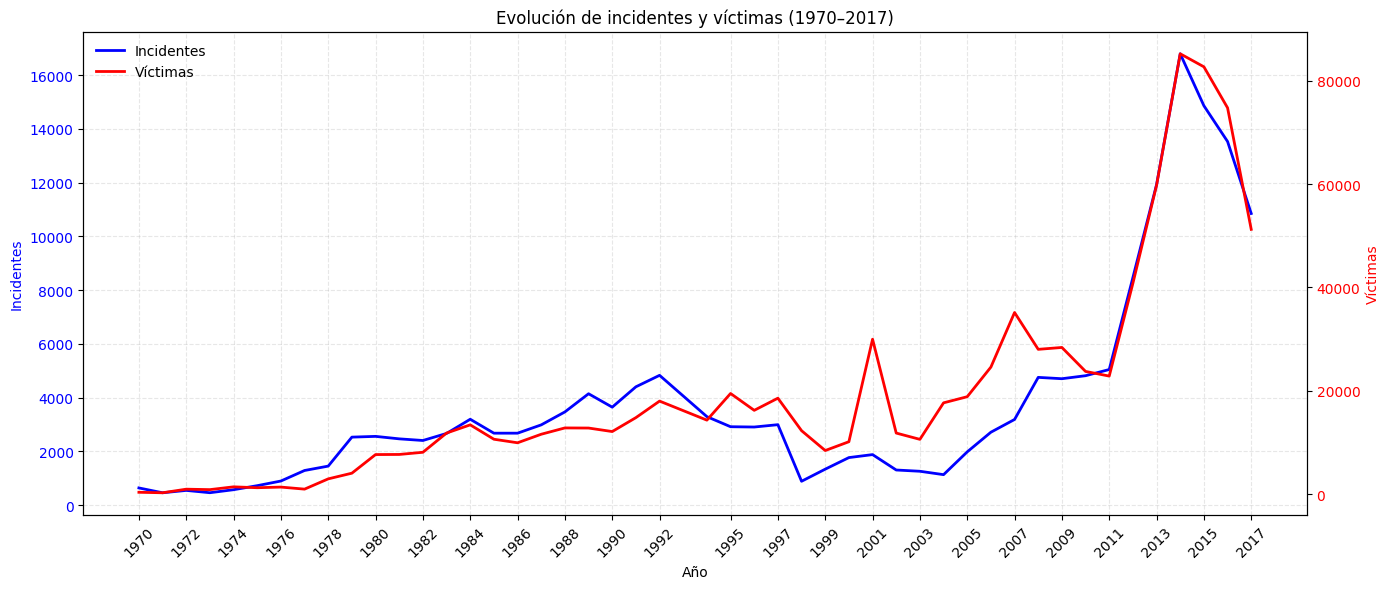

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14,6))

# --- Línea de incidentes ---
ax1.plot(yearly["iyear"], yearly["incidents"],
         color="blue", label="Incidentes", linewidth=2)
ax1.set_ylabel("Incidentes", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# --- Línea de víctimas ---
ax2 = ax1.twinx()
ax2.plot(yearly["iyear"], yearly["casualties"],
         color="red", label="Víctimas", linewidth=2)
ax2.set_ylabel("Víctimas", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# --- Eje X: mostrar todos o algunos años ---
ax1.set_xlabel("Año")
ax1.set_xticks(yearly["iyear"][::2])  # cada 2 años (ajusta si hay muchos)
ax1.set_xticklabels(yearly["iyear"][::2], rotation=45)

# --- Leyenda combinada ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
            loc="upper left", fontsize=10, frameon=False)

# --- Estética ---
plt.title("Evolución de incidentes y víctimas (1970–2017)")
ax1.grid(alpha=0.3, linestyle="--")
fig.tight_layout()
plt.show()



Métodos robustos de cálculo de outliers: IQR (InterQuantile Range)
IQR= Q3-Q1 cuartiles al (25 y 75%).
 - Outlier: Si x < Q1 - n * IQR  y/o x > Q3 + n * IQR
 donde a mayor n el outlier será mas extremo.

In [ ]:
yearly["victims_per_incident"] = yearly["casualties"] / yearly["incidents"]
Q1 = yearly["victims_per_incident"].quantile(0.25)
Q3 = yearly["victims_per_incident"].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (yearly["victims_per_incident"] < Q1 - 1.5*IQR) | \
                (yearly["victims_per_incident"] > Q3 + 1.5*IQR)
extreme_outlier_mask = (yearly["victims_per_incident"] < Q1 - 3*IQR) | \
                (yearly["victims_per_incident"] > Q3 + 3*IQR)
# Muestra solo las filas que son outliers
outliers = yearly[outlier_mask]
e_outliers = yearly[extreme_outlier_mask]

# Imprime el nuevo DataFrame que contiene solo los outliers
print(outliers)
print(e_outliers)


    iyear  incidents  casualties  victims_per_incident
27   1998        891     12273.0             13.774411
30   2001       1883     29978.0             15.920340
33   2004       1137     17662.0             15.533861
36   2007       3190     35147.0             11.017868
    iyear  incidents  casualties  victims_per_incident
30   2001       1883     29978.0             15.920340
33   2004       1137     17662.0             15.533861


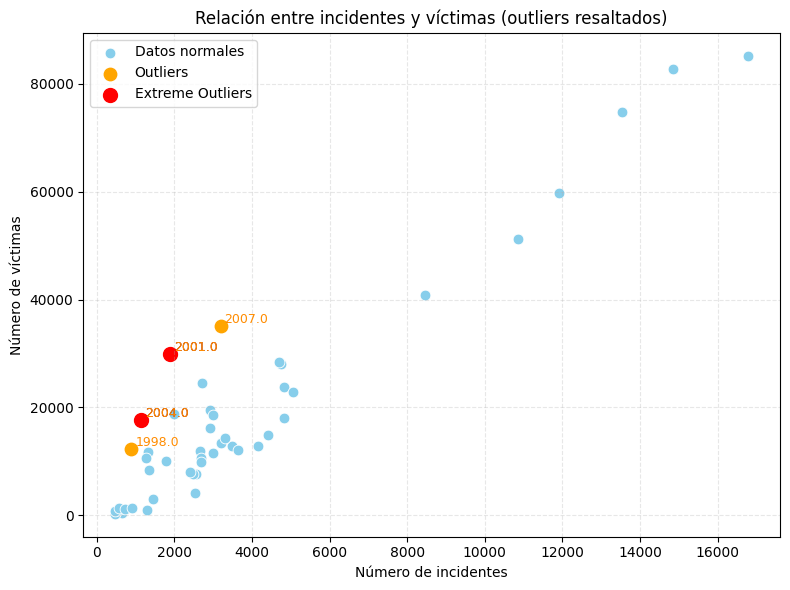

In [ ]:
plt.figure(figsize=(8,6))

# --- Scatter base ---
sns.scatterplot(data=yearly, x="incidents", y="casualties",
                color="skyblue", s=60, label="Datos normales")

# --- Outliers moderados ---
plt.scatter(outliers["incidents"], outliers["casualties"],
            color="orange", s=80, label="Outliers")

# --- Outliers extremos ---
plt.scatter(e_outliers["incidents"], e_outliers["casualties"],
            color="red", s=100, label="Extreme Outliers")

# --- Etiquetas (opcional) ---
for _, row in e_outliers.iterrows():
    plt.text(row["incidents"]+100, row["casualties"]+500,
             str(row["iyear"]), fontsize=9, color="darkred")

for _, row in outliers.iterrows():
    plt.text(row["incidents"]+100, row["casualties"]+500,
             str(row["iyear"]), fontsize=9, color="darkorange")

# --- Estética ---
plt.title("Relación entre incidentes y víctimas (outliers resaltados)")
plt.xlabel("Número de incidentes")
plt.ylabel("Número de víctimas")
plt.grid(alpha=0.3, linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()


Los años 2001 y 2004 la tendencia pierde un poco la correlacion. En ambos casos segun podemos ver en el grafico de evolucion de incidentes y victimas por año, el numero de damnificados es muy grande para el numero de ataques que hay, eso es porque en esos casos alguno o algunos de los ataques involucraron a mucha gente como fueron el 11-S de 2001 o el 11M de 2004.

Question 3
What are the most common methods of attacks? Does it differ in various regions or in time?

In [ ]:
df_attacks = df_reducido[["iyear", "region_txt", "attacktype1_txt"]].copy()
df_attacks = df_attacks.dropna(subset=["attacktype1_txt"])
df_attacks = df_attacks[df_attacks["attacktype1_txt"] != "Unknown"]


In [ ]:
# Calcular los tipos de ataque más comunes
attack_counts = (
    df_attacks["attacktype1_txt"]
    .value_counts()
    .rename_axis("attack_type")   # el nombre de la columna con categorías
    .reset_index(name="count")    # el nombre de la columna con el conteo
)

# Mostrar las primeras filas para verificar
print(attack_counts.head())



                      attack_type  count
0               Bombing/Explosion  86843
1                   Armed Assault  41107
2                   Assassination  18819
3     Hostage Taking (Kidnapping)  10671
4  Facility/Infrastructure Attack  10186


/tmp/ipython-input-2481612218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attack_counts, y="attack_type", x="count", palette="viridis")


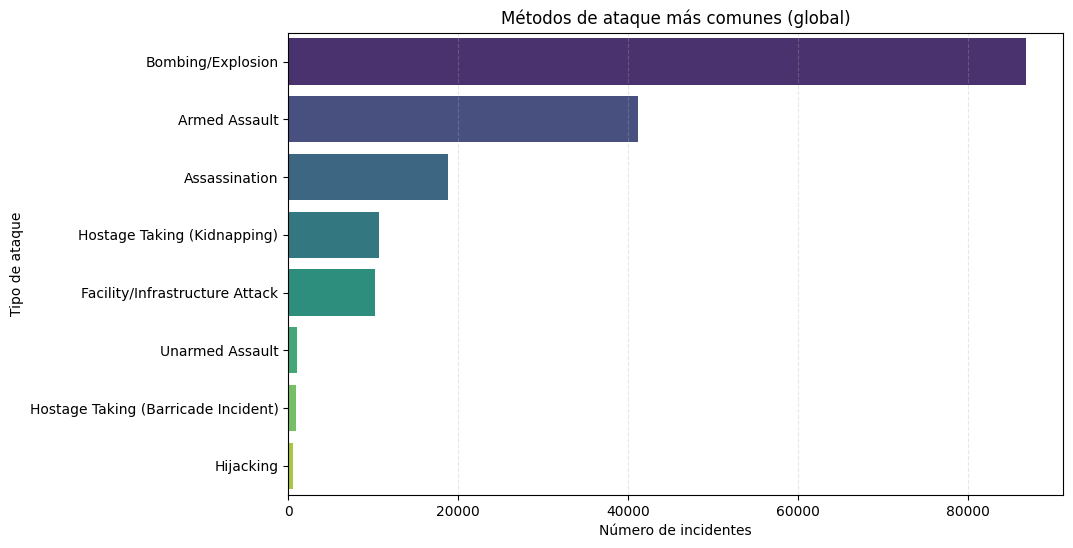

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=attack_counts, y="attack_type", x="count", palette="viridis")
plt.title("Métodos de ataque más comunes (global)")
plt.xlabel("Número de incidentes")
plt.ylabel("Tipo de ataque")
plt.grid(alpha=0.3, linestyle="--", axis="x")
plt.show()


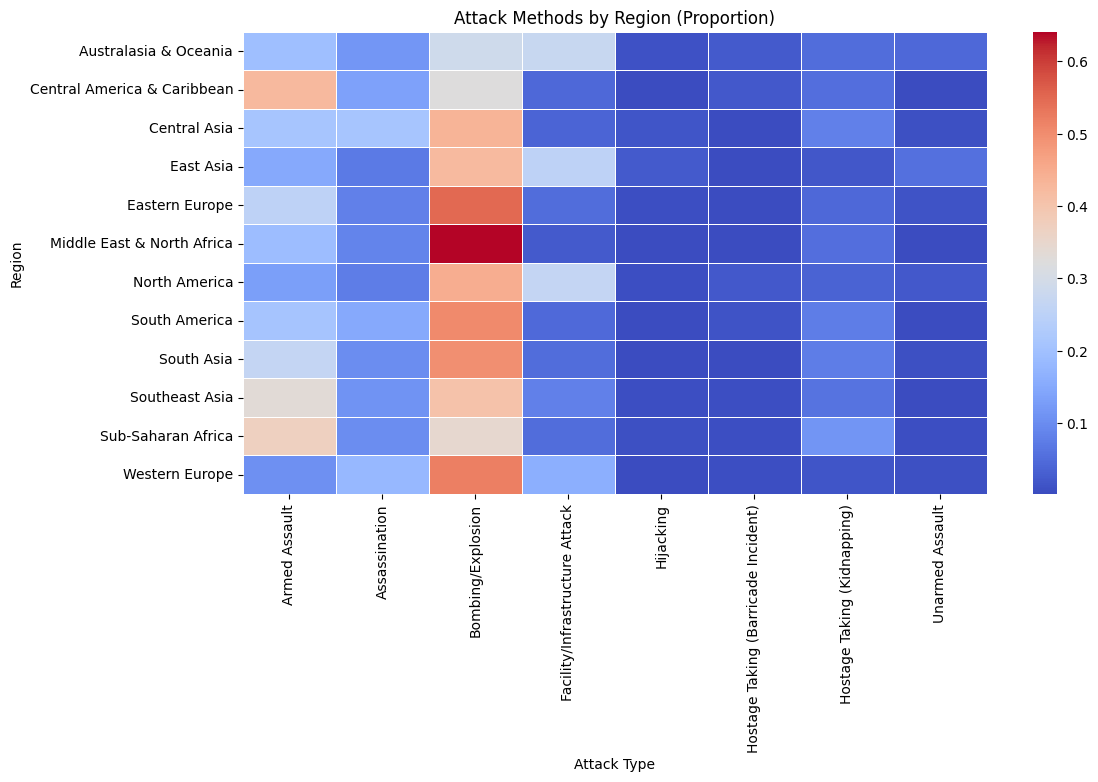

In [ ]:

attack_by_region = df_attacks.groupby('region_txt')['attacktype1_txt'].value_counts(normalize=True).unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(attack_by_region, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Attack Methods by Region (Proportion)")
plt.xlabel("Attack Type")
plt.ylabel("Region")
plt.show()



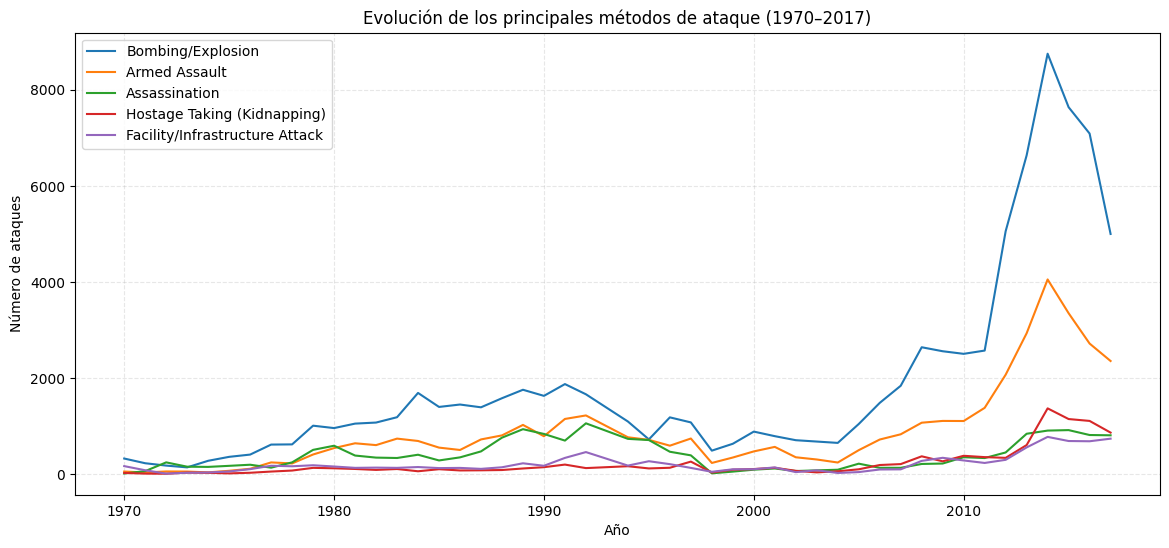

In [ ]:
attack_time = (
    df_attacks.groupby(["iyear", "attacktype1_txt"])
    .size()
    .reset_index(name="count")
)


plt.figure(figsize=(14,6))
for a_type in top_types:
    subset = attack_time[attack_time["attacktype1_txt"] == a_type]
    plt.plot(subset["iyear"], subset["count"], label=a_type)

plt.title("Evolución de los principales métodos de ataque (1970–2017)")
plt.xlabel("Año")
plt.ylabel("Número de ataques")
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.show()


In [ ]:
top_attack_year = (
    attack_time.sort_values(["iyear", "count"], ascending=[True, False])
    .groupby("iyear")
    .first()
    .reset_index()
)

top_attack_year.head(47)


,iyear,attacktype1_txt,count
0,1970,Bombing/Explosion,332
1,1971,Bombing/Explosion,234
2,1972,Assassination,252
3,1973,Assassination,162
4,1974,Bombing/Explosion,285
5,1975,Bombing/Explosion,367
6,1976,Bombing/Explosion,414
7,1977,Bombing/Explosion,622
8,1978,Bombing/Explosion,626
9,1979,Bombing/Explosion,1015


Entonces a la pregunta:
What are the most common methods of attacks? En primer lugar
**Bombing/Explosion** con 86843, seguido de Armed Assault  41107
, y en tercer lugar Assassination  18819.
Does it differ in various regions or in time?
En el tiempo solo hay un ligero cambio en el liderato de ataque más empleado. En el 72 y 73 el asesinato fue el metodo más utilizado pero luego siempre ha sido el bombardeo mundialmente.
En regiones vemos como el bombardeo tambien es lo más frecuente, quiza con la excepcion mas clara de America Central y Caribe donde el asalto a mano armada ha sido lo más utilizado en los años del estudio.

Question 4
Plot the locations of attacks on a map to visualize their regional spread

In [ ]:
import plotly.express as px
locations_df = df_reducido[['iyear', 'country_txt', 'region_txt', 'latitude', 'longitude', 'weaptype1_txt']]
fig = px.scatter_geo(df_reducido.head(50),lat='latitude',lon='longitude', symbol='region_txt',
                     hover_name="country_txt",
                     hover_data=['weaptype1_txt', 'region_txt'])
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()




https://github.com/yagizterzi/TerrorismAnalysis/blob/main/TerrorismAnalysis.ipynb